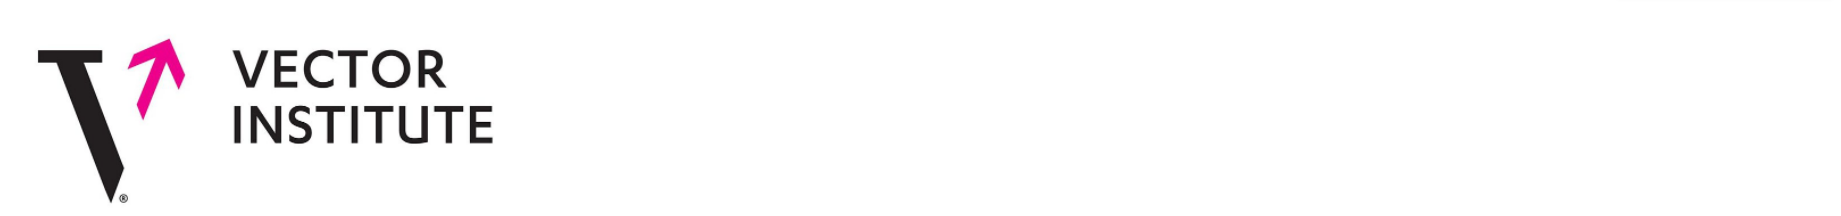

### **Welcome to the Machine Learning Course for Black and Indigenous Students!**
This program is offered by Vector Institute in its drive to build research and expand career pathways in the field of AI for under-represented populations.

Instructor: Bonaventure Molokwu | Assignment Developer: Manmeet Kaur Baxi | Course Tutors: Yinka Oladimeji and Manmeet Kaur Baxi | Course Director: Shingai Manjengwa (@Tjido) 

### ***Never stop learning!***

# Assignment - III, Regression

**Dataset** https://www.kaggle.com/sohier/calcofi
The  California Cooperative Oceanic Fisheries Investigations (CalCOFI) data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. The file contains data collected at depths down to 500m which include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.The objective of the task is to predict salinity.

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import operator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
# Data credits: https://www.kaggle.com/sohier/calcofi
salinity_df = pd.read_csv('https://www.dropbox.com/s/erzelsbm9ryrt0m/assignment3.csv?dl=1')

In [3]:
salinity_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'salinity', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

### Statistical Summary

In [4]:
# Select a random subset from the complete dataset
# salinity_df = salinity_df.iloc[0:150000]
# salinity_df.rename(columns={'Salnty':'salinity'}, inplace=True)
salinity_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,salinity,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,149998.000000,149998.000000,149998.000000,145391.000000,117590.000000,128474.000000,115077.000000,102277.000000,102277.000000,0.0,149998.000000,145391.000000,4818.000000,117590.000000,33133.000000,149998.0,22120.000000,35803.000000,48797.000000,0.0,149998.0,0.0,149998.0,56437.000000,93561.0,0.0,149998.0,0.0,149998.0,0.0,149998.0,0.0,149998.0,0.0,0.0,149998.0,0.0,0.0,149998.0,0.0,0.0,149998.0,0.0,0.0,149998.0,0.0,0.0,149998.000000,145391.000000,115239.000000,117590.000000,114195.000000,114195.000000,117848.000000,128474.000000,103713.000000,0.0,56437.000000,0.0,0.0,0.0,0.0,0.0,149998.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2604.624255,75001.500000,324.761790,9.513035,33.874509,2.879955,26.042584,48.096165,127.067193,NaN,5.054107,2.014478,8.956206,2.505902,8.978118,9.0,8.973056,8.975365,8.977949,NaN,9.0,NaN,9.0,2.027097,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,324.761790,9.513035,9.639491,33.874254,26.035359,200.206231,0.542168,2.879955,48.663676,NaN,2.027097,NaN,NaN,NaN,NaN,NaN,327.245557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1610.360305,43300.837176,370.746751,4.392561,0.508466,2.145869,1.063966,37.726776,93.779254,NaN,1.999275,0.155344,0.204658,0.499967,0.146299,0.0,0.161923,0.155012,0.146849,NaN,0.0,NaN,0.0,1.105452,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,370.746751,4.392561,4.422240,0.515593,1.063596,98.325539,0.455828,2.145869,37.834793,NaN,1.105452,NaN,NaN,NaN,NaN,NaN,374.387685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,3.000000,0.000000,1.540000,30.250000,0.000000,21.713000,0.000000,0.000000,NaN,3.000000,1.000000,8.000000,2.000000,8.000000,9.0,8.000000,8.000000,8.000000,NaN,9.0,NaN,9.0,0.020000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.000000,1.540000,1.240000,4.570000,21.710000,38.800000,0.000000,0.000000,0.000000,NaN,0.020000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1212.000000,37502.250000,50.000000,5.940000,33.480000,0.650000,25.125000,9.500000,29.152720,NaN,3.000000,2.000000,9.000000,2.000000,9.000000,9.0,9.000000,9.000000,9.000000,NaN,9.0,NaN,9.0,0.750000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,50.000000,5.940000,6.090000,33.480000,25.120000,117.000000,0.160000,0.650000,9.700000,NaN,0.750000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2508.000000,75001.500000,178.000000,8.860000,33.964000,2.540000,26.317000,39.400000,112.698300,NaN,7.000000,2.000000,9.000000,3.000000,9.000000,9.0,9.000000,9.000000,9.000000,NaN,9.0,NaN,9.0,2.300000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,178.000000,8.860000,8.950000,33.964000,26.310000,173.200000,0.420000,2.540000,40.500000,NaN,2.300000,NaN,NaN,NaN,NaN,NaN,179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3927.000000,112500.750000,500.000000,12.470000,34.322000,5.170000,26.948000,89.900000,227.461000,NaN,7.000000,2.000000,9.000000,3.000000,9.000000,9.0,9.000000,9.000000,9.000000,NaN,9.0,NaN,9.0,3.060000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,500.000000,12.470000,12.710000,34.322000,26.940000,284.500000,0.850000,5.170000,90.600000,NaN,3.060000,NaN,NaN,NaN,NaN,NaN,503.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5676.000000,150000.000000,3762.000000,28.540000,35.280000,8.710000,28.083000,143.400000,380.014900,NaN,7.000000,3.000000,9.00

### Data Cleaning
Cleaning up the NULL and duplicate values in the dataset:
1. Check for NULL percentages
2. Drop attributes with more than 30% data missing
3. Fill remaining NULLs with mean values
4. Re-check NULL Percentages
5. Check for duplicates

Check for NULL percentages

In [5]:
nulls = salinity_df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(salinity_df)*100,2)

salinity_df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
salinity_df_null.Attr  = nulls.index
salinity_df_null.Total = nulls.values
salinity_df_null.Percent = prcet.values
print(salinity_df_null.head(20))

                   Attr   Total  Percent
0   DIC Quality Comment  149998    100.0
1                  DIC1  149998    100.0
2                SiO3uM  149998    100.0
3                 NO2uM  149998    100.0
4               R_PHAEO  149998    100.0
5                 NO3uM  149998    100.0
6                R_CHLA  149998    100.0
7                 NH3uM  149998    100.0
8                 R_NH4  149998    100.0
9                C14As1  149998    100.0
10               C14A1p  149998    100.0
11                R_NO2  149998    100.0
12               C14As2  149998    100.0
13               C14A2p  149998    100.0
14                R_NO3  149998    100.0
15               DarkAs  149998    100.0
16               DarkAp  149998    100.0
17               MeanAs  149998    100.0
18               MeanAp  149998    100.0
19               R_SIO3  149998    100.0


Drop attributes with more than 30% data missing

In [6]:
for i in salinity_df_null.Attr[salinity_df_null['Percent'] > 30]:
    salinity_df = salinity_df.drop([i], axis=1)

Fill remaining NULLs with mode values

In [7]:
for i in salinity_df.columns:
    if salinity_df[i].isnull().sum() > 0:
        salinity_df[i].fillna(salinity_df[i].mode().mean(), inplace=True)

Re-check NULL Percentages

In [8]:
nulls = salinity_df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(salinity_df)*100,2)

salinity_df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
salinity_df_null.Attr  = nulls.index
salinity_df_null.Total = nulls.values
salinity_df_null.Percent = prcet.values
print(salinity_df_null.head())

      Attr  Total  Percent
0  Cst_Cnt      0      0.0
1  Btl_Cnt      0      0.0
2     R_O2      0      0.0
3  R_DYNHT      0      0.0
4    R_SVA      0      0.0


Check for Duplicated values

In [9]:
print('COUNT OF DUPLICATES:  {}'.format(salinity_df.duplicated().sum()))

COUNT OF DUPLICATES:  0


### Drop columns that cannot be Normalized 
* Cst_Cnt Auto-numbered Cast Count
* Btl_Cnt Auto-numbered Bottle count
* Sta_ID CalCOFI Line and Station
* Depth_ID [Century]-[YY][MM][ShipCode]

In [10]:
drop_cols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm',]
salinity_df_norm = salinity_df.drop(drop_cols, axis=1)  #  data for normalization
salinity_df_scale = salinity_df_norm.copy(deep=True)    #  backup data

Normalization

In [11]:
salinity_df_scale = StandardScaler().fit_transform(salinity_df_scale)

#  create dataframe
salinity_df_norm = pd.DataFrame(salinity_df_scale, index=salinity_df_norm.index, columns=salinity_df_norm.columns)

### Correlation of features with Salinity

In [12]:
salinity_df_norm.corr()

#  Drop columns with mode = "0.0".  No impact on correlation
print('Columns with mode:0')
for i in salinity_df_norm.columns.tolist():
    if (salinity_df_norm[i].mode()[0] == 0.0):
        print(' - ',i,salinity_df_norm[i].mode()[0])
        salinity_df_norm = salinity_df_norm.drop(i,axis=1)

#  Create correlation dataframe
print()
print('Correlation dataframe')
salinity_df_corr = pd.DataFrame(columns=['Attributes','Correlation'])
salinity_df_corr.Attributes = salinity_df_norm.corr()['salinity'].sort_values(ascending=False).index
salinity_df_corr.Correlation = salinity_df_norm.corr()['salinity'].sort_values(ascending=False).values
print(salinity_df_corr)

Columns with mode:0
 -  P_qual 0.0
 -  Chlqua 0.0
 -  Phaqua 0.0
 -  SiO3qu 0.0
 -  NO2q 0.0
 -  NO3q 0.0
 -  NH3q 0.0
 -  C14A1q 0.0
 -  C14A2q 0.0
 -  DarkAq 0.0
 -  MeanAq 0.0

Correlation dataframe
    Attributes  Correlation
0     salinity     1.000000
1   R_SALINITY     0.988342
2       STheta     0.801297
3      R_SIGMA     0.798108
4      R_Depth     0.558392
5       R_PRES     0.557897
6      R_DYNHT     0.368067
7       S_prec     0.272391
8       RecInd     0.096590
9       T_prec    -0.008384
10      R_TEMP    -0.512014
11      T_degC    -0.512014
12    R_POTEMP    -0.597880
13      O2ml_L    -0.672944
14        R_O2    -0.672944
15       R_SVA    -0.795031


### Feature selection based on correlation with 'Salinity'

In [13]:
salinity_df_norm = salinity_df_norm[['STheta','R_SIGMA','R_Depth','R_DYNHT','S_prec','RecInd','T_degC','O2ml_L','salinity']]

x = salinity_df_norm.iloc[:,:-1]
y = salinity_df_norm['salinity']

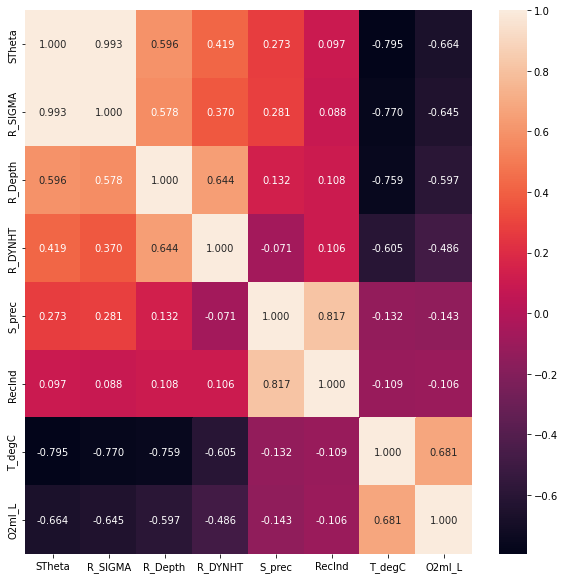

In [14]:
# Correlation matrix
corr = x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Q1. Explain multicollinearity and it's effects on the model. Check for multicollinearity using Variance Inflation Factor (VIF). How would you solve the multicollinearity problem ? (4 marks) 

Ans:
Multicollinearity do  occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF). In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

$$VIF=\frac{1}{1-R^2}$$

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

### Model building

In [16]:
def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)
test_r2 = linear_regressor.score(X_test, y_test)
print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))

R2 Score: 0.807144126097284
RMSE: 0.43632007459354144


### Q2. Cross validate using the different number of features for Linear Regression model and check the effects on the R2 score and RMSE.  (4 marks)

*(Hint: Use sklearn.feature_selection.RFE)*


###  Q3. Run the following regression algorithms using the same data, obtain the R2 scores and RMSE values:
###     i. Gradient Boosting Regressor (3 marks)


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


Model Accuracy: 0.956
The mean squared error (MSE) on test set: 0.0438


### ii. Random Forest Regressor (3 marks)

In [19]:
from sklearn.ensemble import RandomForestRegressor
# Train the model
regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
regr.fit(X_train, y_train.values.ravel())
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [20]:
# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), y_pred)
# R-squared scores
r2 = r2_score(y_test.values.ravel(),y_pred)

# Print metrics
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Squared Error: 0.19
R-squared scores: 0.81


### iii. ADA Boost Regressor (3 marks)

In [21]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
                  # Fitting the model
xgb_r.fit(X_test, y_test)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
                

[12:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.566746


### Q4. Which model performed the best and why? Give reasons. (3 marks)

The Gradient Boosting Regressor has the best model perormance which is R2 of  0.956 and  mean squared error (MSE) of 0.0438